In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

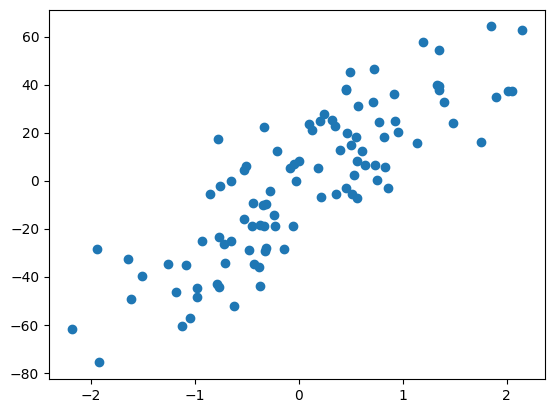

In [7]:
x,y = make_regression(n_samples = 100, n_features = 1, n_informative  = 1, n_targets=1, noise= 20, random_state=13)
plt.scatter(x,y)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 4, test_size = 0.2)

R2 score for linear regression :  0.6820980909818857


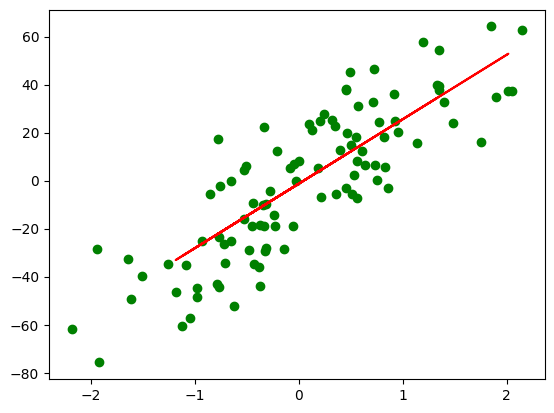

In [10]:
lr1 = LinearRegression()
lr1.fit(x_train, y_train)
pred1 = lr1.predict(x_test)
print("R2 score for linear regression : ", r2_score(y_test, pred1))
plt.scatter(x,y, color = 'green')
plt.plot(x_test, pred1, color = 'red')



C:\Users\Aditya\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\Aditya\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Aditya\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.066e+04, tolerance: 7.150e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_m

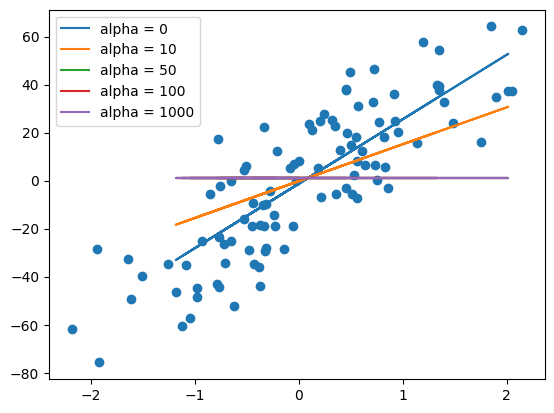

In [12]:
alphas = [0, 10, 50, 100, 1000]
plt.scatter(x,y)

for i in alphas:
    l = Lasso(alpha = i)
    l.fit(x_train, y_train)
    plt.plot(x_test, l.predict(x_test), label='alpha = {}'.format(i))
plt.legend()
plt.show()

### We saw lasso regression for linear regression, lets see it for polynomial regression

Will create suitable dataset for the same purpose

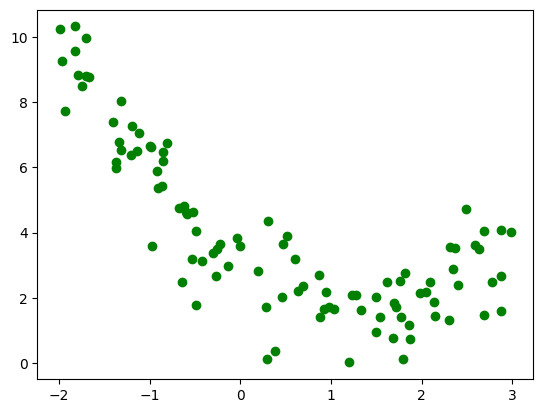

In [14]:
m =100
x1 = 5*np.random.rand(m,1) -2
x2 = 0.7 * x1 ** 2 -2 *x1 + 3 + np.random.randn(m,1)

plt.scatter(x1, x2, color = 'green')
plt.show()

C:\Users\Aditya\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.160e+01, tolerance: 6.081e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Aditya\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.437e+02, tolerance: 6.081e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Aditya\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

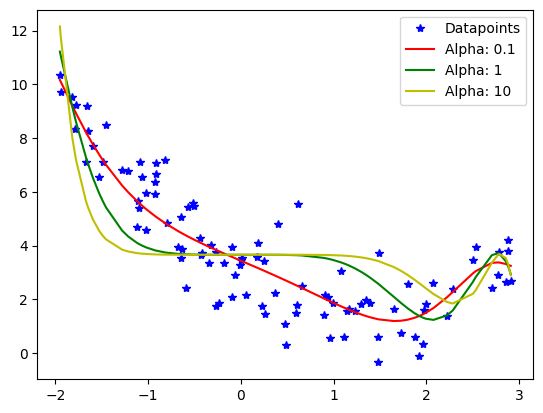

In [29]:
def lasso_prediction(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('lasso', Lasso(alpha=alpha, max_iter=10000))  
    ])
    model.fit(x1, x2)
    return model.predict(x1)  

m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

# Plotting
plt.plot(x1, x2, 'b*', label='Datapoints')

alphas = [0.1, 1, 10]
cs = ['r', 'g', 'y']

for alpha, c in zip(alphas, cs):
    preds = lasso_prediction(x1, x2, alpha)
    # Match sorting and indexing
    sorted_indices = np.argsort(x1[:, 0])  # Sort x1
    plt.plot(
        x1[sorted_indices, 0],  # Sorted x1
        preds[sorted_indices],  # Sorted predictions
        c,
        label=f'Alpha: {alpha}'
    )

plt.legend()
plt.show()